<a href="https://colab.research.google.com/github/Shubham-p-02/my_task02/blob/main/mytask02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#importing liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
pd.set_option('display.max_columns', None)

file_path = "/content/SalesDataset.csv"   # ⬅️ change to your file name
df = pd.read_csv("/content/SalesDataset.csv")

print("Dataset Loaded Successfully!")
display(df.head())



Dataset Loaded Successfully!


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [35]:
#Basic Info & Summary
print("\nDataset Shape:", df.shape)
print("\nColumns:", df.columns)

print("\nInfo:")
print(df.info())
print('\n')
print("\nSummary Statistics:")

# Columns to be excluded from descriptive statistics
columns_to_exclude = ['transaction_id', 'date', 'customer_id', 'year', 'month']

# Selecting only numerical columns and then droping the specified columns
numeric_cols_for_describe = df.select_dtypes(include=np.number).drop(columns=columns_to_exclude, errors='ignore')

print(numeric_cols_for_describe.describe())


Dataset Shape: (1000, 12)

Columns: Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount',
       'year', 'month', 'month_name'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    1000 non-null   int64         
 1   date              1000 non-null   datetime64[ns]
 2   customer_id       1000 non-null   object        
 3   gender            1000 non-null   object        
 4   age               1000 non-null   int64         
 5   product_category  1000 non-null   object        
 6   quantity          1000 non-null   int64         
 7   price_per_unit    1000 non-null   int64         
 8   total_amount      1000 non-null   int64         
 9   year              1000 non-null   int32         
 10

In [36]:


# Missing Values
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# filling numeric with median, text with mode
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

#Converting Date Column
date_column = "date"
df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

# drop rows where date conversion failed
df = df.dropna(subset=[date_column])

#Creating New Time Features
df["year"] = df[date_column].dt.year
df["month"] = df[date_column].dt.month
df["month_name"] = df[date_column].dt.strftime("%b")

#Cleaning Categorical Text
text_cols = df.select_dtypes(include='object').columns

for col in text_cols:
    df[col] = df[col].str.strip().str.lower()

#Checking Unique values
for col in text_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique()[:10])

#Core Business Columns
sales_col = "total_amount"
product_col = "product_category"
customer_col = "customer_id"


# Top Customers
top_customers = df.groupby(customer_col)[sales_col].agg(['sum', 'count']).sort_values('sum', ascending=False).head(10)
top_customers.columns = ['Total Spent', 'Purchase Count']
display(top_customers)


Missing Values Before Cleaning:
transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
year                0
month               0
month_name          0
dtype: int64

Missing Values After Cleaning:
transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
year                0
month               0
month_name          0
dtype: int64

Unique values in customer_id:
['cust001' 'cust002' 'cust003' 'cust004' 'cust005' 'cust006' 'cust007'
 'cust008' 'cust009' 'cust010']

Unique values in gender:
['male' 'female']

Unique values in product_category:
['beauty' 'clothing' 'electronics']

Unique values in month_name:
['nov' 'feb' 'jan' 'may' 'apr' 'mar' 'dec' 'oct' 'aug' 'sep']


,Total Spent,Purchase Count
customer_id,,
cust015,2000,1
cust412,2000,1
cust970,2000,1
cust547,2000,1
cust281,2000,1
cust416,2000,1
cust420,2000,1
cust927,2000,1
cust447,2000,1


In [37]:
display(top_customers)

,Total Spent,Purchase Count
customer_id,,
cust015,2000,1
cust412,2000,1
cust970,2000,1
cust547,2000,1
cust281,2000,1
cust416,2000,1
cust420,2000,1
cust927,2000,1
cust447,2000,1


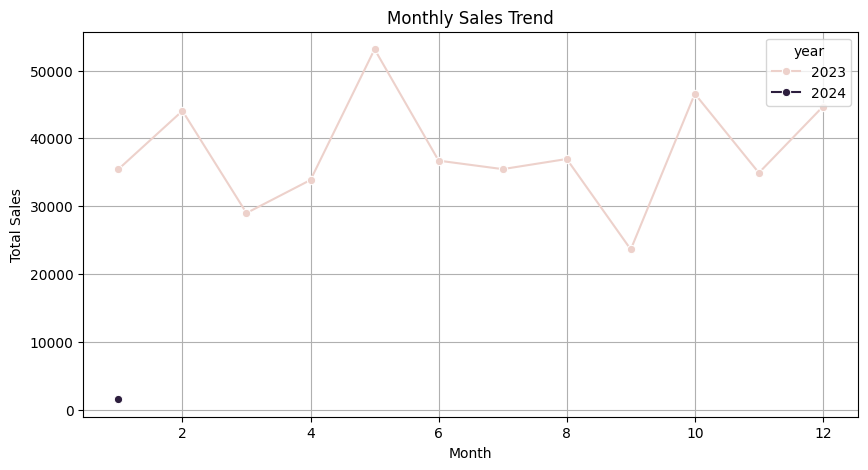

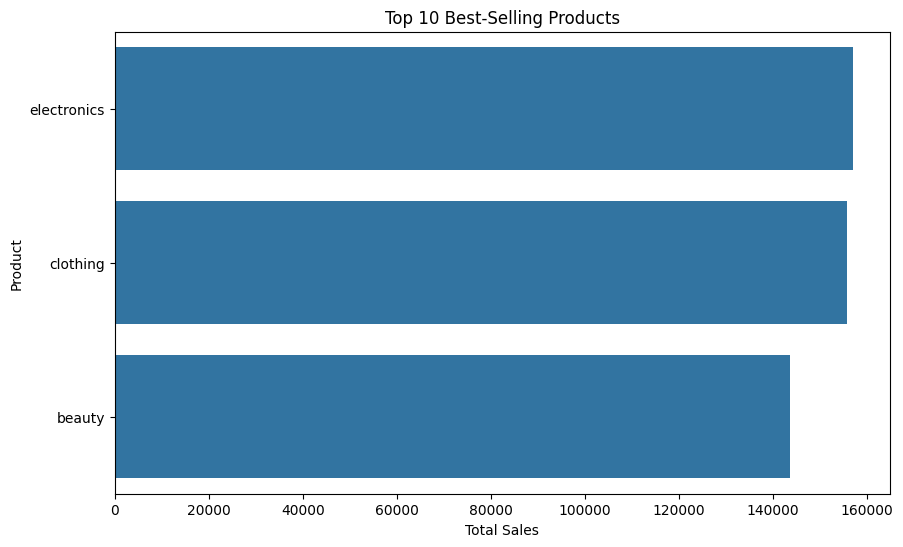

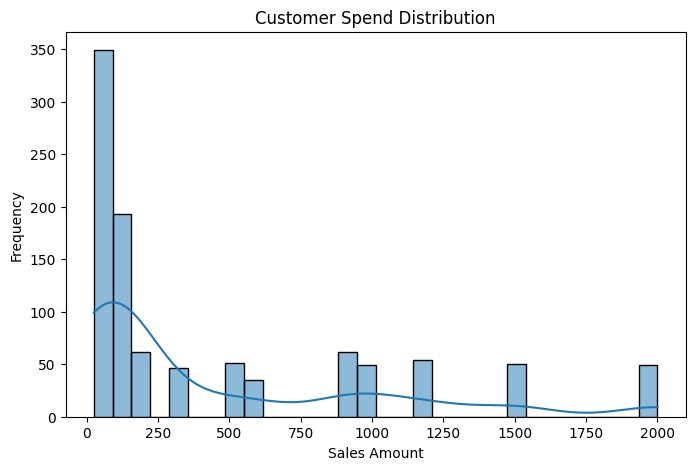

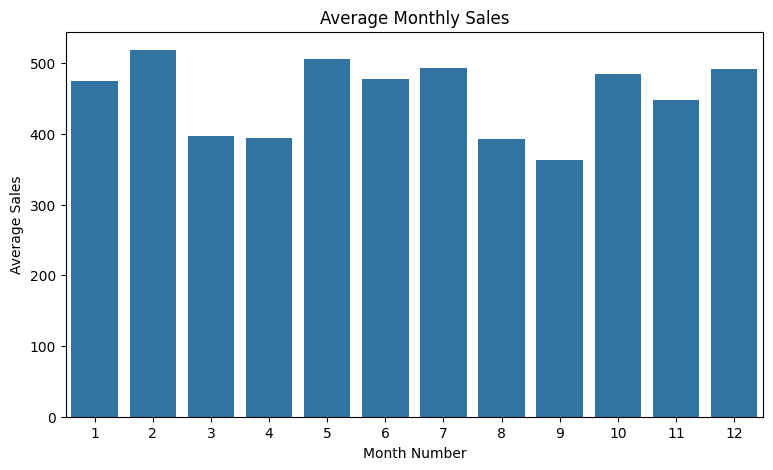


Cleaned dataset saved as cleaned_sales_data.csv


In [33]:
#Monthly Sales Trend
monthly_sales = df.groupby(["year", "month"])[sales_col].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x="month", y=sales_col, hue="year", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

#Best Selling Products
top_products = df.groupby(product_col)[sales_col].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()



#Customer Spend Distribution
plt.figure(figsize=(8,5))
sns.histplot(df[sales_col], bins=30, kde=True)
plt.title("Customer Spend Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

#Average Sales by Month
avg_monthly_sales = df.groupby("month")[sales_col].mean()

plt.figure(figsize=(9,5))
sns.barplot(x=avg_monthly_sales.index, y=avg_monthly_sales.values)
plt.title("Average Monthly Sales")
plt.xlabel("Month Number")
plt.ylabel("Average Sales")
plt.show()

#Save Cleaned Data
df.to_csv("cleaned_sales_data.csv", index=False)
print("\nCleaned dataset saved as cleaned_sales_data.csv")

*   **Cleaned Data Saved:** The processed DataFrame has been saved to a new CSV file named `cleaned_sales_data.csv`.